In [53]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [54]:
# Read data
path = 'data/medcenter.csv'
medcenter_df = pd.read_csv(path)

In [55]:
medcenter_df.drop('Patient ID', axis = 1, inplace=True)

In [56]:
categorical_features = ['Age Group', 'How do you Feel', 'Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Asthma Status', 'Do you Exercise', 'Gender', 'Kidney Disease', 'Is Smoking', 'Ethnicity', 'Diabetes', 'How many Drinks per Week', 'History of Stroke']
numerical_features = ['Hours of sleep', 'Mental Health', 'Body Mass Index', 'Physical Health']

In [57]:
df = medcenter_df.copy()

In [58]:
# Conditions for filtering
condition = (
    (medcenter_df['Physical Health'] == 0) & (
        (medcenter_df['How do you Feel'] == 'Poor') |
        (medcenter_df['How do you Feel'] == 'Fair') |
        (medcenter_df['Walking Difficulty'] == 'Y') |
        (medcenter_df['Do you Exercise'] == 'N') |
        (medcenter_df['Hours of sleep'] > 14) |
        (medcenter_df['Hours of sleep'] < 4) |
        (medcenter_df['Body Mass Index'] > 30) |
        (medcenter_df['Body Mass Index'] <15 ) |
        (medcenter_df['Diabetes'] == 'Y') | 
        (medcenter_df['Torsades de Pointes'] == 'Y') |
        (medcenter_df['Mental Health'] > 5) 
        
    )
)

# Applying the conditions to filter the dataframe
df = medcenter_df[~condition]

print("Shape of the dataframe after filtering:", df.shape)
print("Number of rows removed:", medcenter_df.shape[0] - df.shape[0])

Shape of the dataframe after filtering: (157766, 18)
Number of rows removed: 103545


In [40]:
# remove outliers with interquartile range
# def remove_outliers(df, col_name):
#     '''Remove outliers from a dataframe by column name
#     and return a new dataframe'''
#     q1 = df[col_name].quantile(0.25)
#     q3 = df[col_name].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - (1.5 * iqr)
#     upper_bound = q3 + (1.5 * iqr)
#     df = df[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]
#     return df
# print("Shape of the dataframe before removing outliers:", df.shape)

# # Removing outliers from the dataframe
# for col in numerical_features:
#     df = remove_outliers(df, col)
# print("Shape of the dataframe after removing outliers:", df.shape)

Shape of the dataframe before removing outliers: (157766, 18)
Shape of the dataframe after removing outliers: (102546, 18)


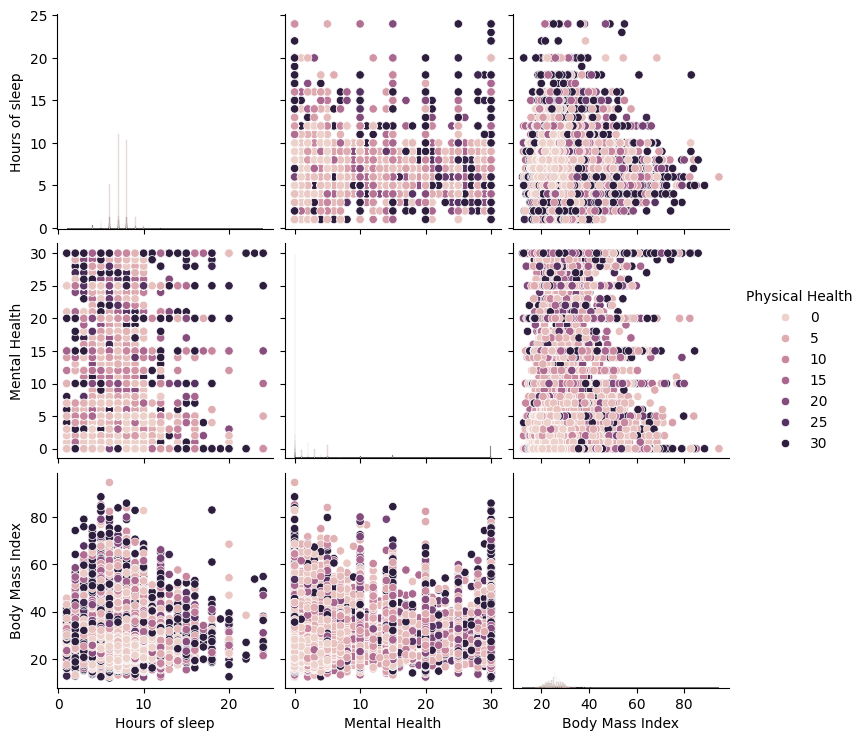

In [59]:
sns.pairplot(df, hue='Physical Health', diag_kind='hist')

In [60]:
df.reset_index(inplace=True, drop = True)

In [61]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Columns to be one-hot encoded
onehot_encoded_columns = ['Gender', 'Ethnicity', 'Walking Difficulty', 'Skin Cancer', 'Torsades de Pointes', 'Asthma Status', 'Do you Exercise', 'Kidney Disease','Is Smoking','History of Stroke', 'How many Drinks per Week']
# Columns to be label encoded
label_encoded_columns = ["How do you Feel", "Age Group", "Diabetes"]

# Applying OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # 'drop' parameter is used to avoid multicollinearity
for column in onehot_encoded_columns:
    # The encoder returns a 2D array, which we need to convert to a DataFrame
    onehot_df = pd.DataFrame(encoder.fit_transform(df[[column]]))
    
    # The new columns will be named after the classes detected by the encoder
    onehot_df.columns = encoder.get_feature_names_out([column])
    
    # Drop the original column from the main DataFrame
    df.drop([column], axis=1, inplace=True)
    
    # Concatenate the one-hot encoded DataFrame to the main one
    df = pd.concat([df, onehot_df], axis=1)

# Applying LabelEncoder
le = LabelEncoder()
for column in label_encoded_columns:
    df[column] = le.fit_transform(df[column])

df.head()


,Hours of sleep,How do you Feel,Diabetes,Age Group,Mental Health,Body Mass Index,Physical Health,Gender_M,Ethnicity_Asian,Ethnicity_Black,...,Ethnicity_White,Walking Difficulty_Y,Skin Cancer_Y,Torsades de Pointes_Y,Asthma Status_Y,Do you Exercise_Y,Kidney Disease_Y,Is Smoking_Y,History of Stroke_Y,How many Drinks per Week_Y
0,10.0,2,0,12,0.0,15.55,7.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,7.0,1,2,9,0.0,38.62,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.0,2,0,8,0.0,21.62,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1,0,12,0.0,23.38,15.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,7.0,2,2,10,10.0,32.12,15.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


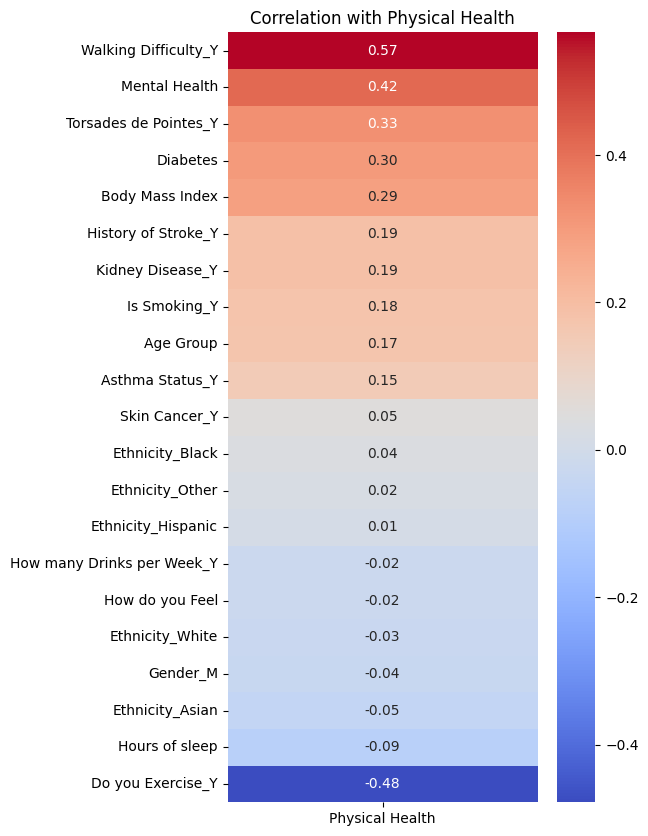

In [62]:
# heatmap with only the target variable
corr_medcenter_df = df.corr()

# Define the target variable
target_variable = 'Physical Health'

# Compute the correlation with the target variable
target_corr = corr_medcenter_df[target_variable].drop(target_variable)

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target variable
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=True)
plt.title(f'Correlation with {target_variable}')
plt.show()

In [45]:
column_to_drop = ['Ethnicity_Black','Ethnicity_Asian','Gender_M','Ethnicity_Hispanic',  'Ethnicity_Other', 'Ethnicity_White', 'Skin Cancer_Y','How many Drinks per Week_Y']
df.drop(column_to_drop, axis = 1, inplace=True)  

In [63]:
from sklearn.model_selection import train_test_split


X = df.drop('Physical Health', axis=1)
y = df['Physical Health']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Only transform the test data using the already fitted scaler
X_test = scaler.transform(X_test)

# Now X_train has scaled columns and X_test has columns scaled using the training data statistics


In [65]:
# Function to evaluate or regression models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_score(reg, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = reg.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred):.3f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred):.3f}")
        print(f"R-squared: {r2_score(y_train, pred):.3f}")
        
    elif not train:
        pred = reg.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred):.3f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred):.3f}")
        print(f"R-squared: {r2_score(y_test, pred):.3f}")



In [66]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

print_score(tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(tree_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 0.687
Mean Absolute Error: 0.093
R-squared: 0.993
Test Result:
Mean Squared Error: 84.079
Mean Absolute Error: 4.759
R-squared: 0.123


In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=tree_reg, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1
    )

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

decision_tree_tuned_mae = mean_absolute_error(y_test, grid_search.predict(X_test))
decision_tree_tuned_r2 = r2_score(y_test, grid_search.predict(X_test))

# use the best parameter to train the model and print the performance
best_tree_reg = grid_search.best_estimator_
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.5480704583167425
Train Result:
Mean Squared Error: 38.206
Mean Absolute Error: 3.661
R-squared: 0.597
Test Result:
Mean Squared Error: 41.700
Mean Absolute Error: 3.806
R-squared: 0.565


In [68]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

print_score(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score(rf_reg, X_train, y_train, X_test, y_test, train=False)

random_forest_mae = mean_absolute_error(y_test, rf_reg.predict(X_test))
random_forest_r2 = r2_score(y_test, rf_reg.predict(X_test))

Train Result:
Mean Squared Error: 6.730
Mean Absolute Error: 1.523
R-squared: 0.929
Test Result:
Mean Squared Error: 44.812
Mean Absolute Error: 4.017
R-squared: 0.533


In [69]:
from sklearn.ensemble import HistGradientBoostingRegressor

hist_gb_model = HistGradientBoostingRegressor()
hist_gb_model.fit(X_train, y_train)

print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=True)
print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=False)

hist_gradient_boosting_mae = mean_absolute_error(y_test, hist_gb_model.predict(X_test))
hist_gradient_boosting_r2 = r2_score(y_test, hist_gb_model.predict(X_test))


Train Result:
Mean Squared Error: 39.038
Mean Absolute Error: 3.756
R-squared: 0.588
Test Result:
Mean Squared Error: 39.843
Mean Absolute Error: 3.786
R-squared: 0.585


In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [15, 30, 45],
}

# Use RandomizedSearchCV for hyperparameter tuning
hist_gb_tuned = RandomizedSearchCV(
    estimator=hist_gb_model,
    param_distributions=param_grid,
    n_iter= 100,  # Adjusting the number of iterations
    scoring='r2', 
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Using all available CPU cores
    random_state=42,
    verbose = 1
)

hist_gb_tuned.fit(X_train, y_train)
print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=False)

hist_gb_tuned_mae = mean_absolute_error(y_test, hist_gb_tuned.predict(X_test))
hist_gb_tuned_r2 = r2_score(y_test, hist_gb_tuned.predict(X_test))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Train Result:
Mean Squared Error: 38.648
Mean Absolute Error: 3.739
R-squared: 0.592
Test Result:
Mean Squared Error: 39.897
Mean Absolute Error: 3.788
R-squared: 0.584


In [ ]:
# try neural networks
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

print_score(mlp_reg, X_train, y_train, X_test, y_test, train=True)
print_score(mlp_reg, X_train, y_train, X_test, y_test, train=False)

